 Model loaded successfully!


<ipython-input-16-2d94ca66539d>:23: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

 R² Score: 0.05152019243081174
 Mean Squared Error: 89.16379159765667
 Mean Absolute Error: 6.806596422102134


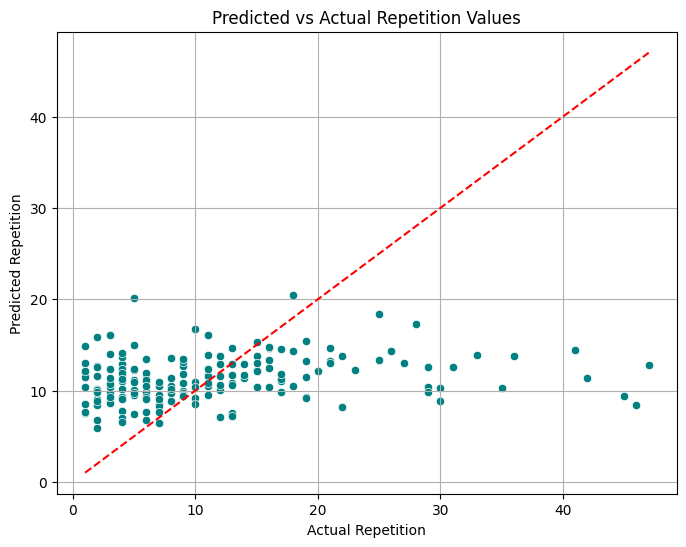

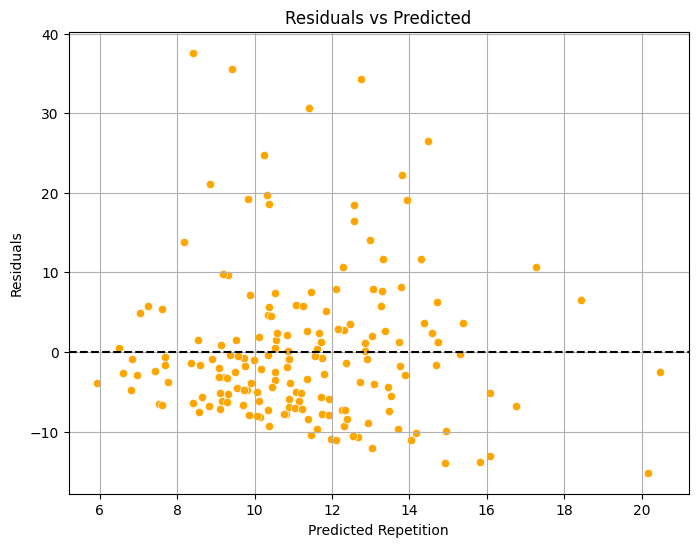

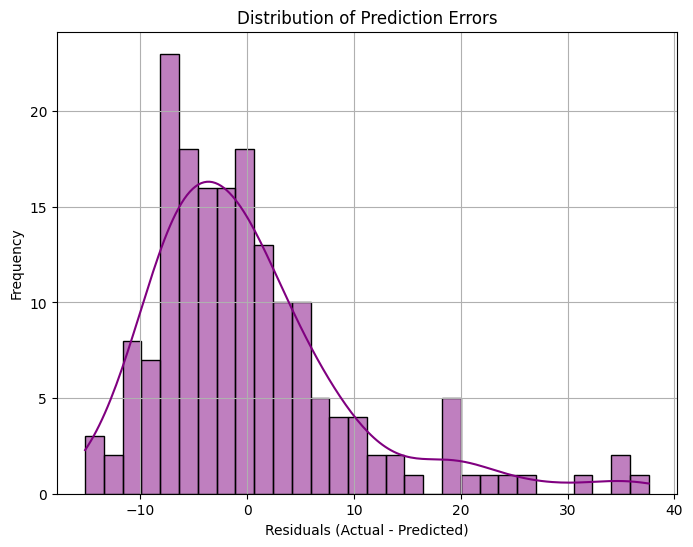

In [16]:
# Importing necessary libraries
import joblib
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


# Loading GitHub raw URL of the model
url = 'https://raw.githubusercontent.com/vjjain382/CS6405/main/best_random_forest_model.pkl'

# Downloading the model file
urllib.request.urlretrieve(url, 'best_random_forest_model.pkl')

# Loading the model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Confirming loading
print(" Model loaded successfully!")

loaded_model

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv", header = None)
df.head()

df = pd.read_csv('https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv')
df = df.iloc[:, 1:]
df.head()

selected_features = ['X_Shoulder_acc_MPSD', 'X_Shoulder_acc_Power_Dominant_Band',
                     'X_Shoulder_acc_Total_Power', 'Y_Shoulder_acc_Freq_MPSD',
                     'Y_Shoulder_acc_Total_HighFreq_Power', 'Y_Shoulder_acc_PSD_Skewness',
                     'Y_Torso_acc_MPSD']
X = df[selected_features]
y = df['Repetition']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Making predictions
y_pred = loaded_model.predict(X_test)

# Evaluating performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing results
print(" R² Score:", r2)
print(" Mean Squared Error:", mse)
print(" Mean Absolute Error:", mae)

# Predicted vs Actual Repetition Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Repetition')
plt.ylabel('Predicted Repetition')
plt.title('Predicted vs Actual Repetition Values')
plt.grid(True)
plt.show()

# Residuals vs Predicted
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='orange')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted Repetition')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.show()

# Residuals (Actual - Predicted)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()